## Занятие 02. "Основы машинного обучения"
Домашнее задание выполнено **Мельниковой Маргаритой**

---
### Задача
- Обработать данные, по аналогии, что в первой домашке, но добавляем подготовку и анализ категориальных значений.
- Будет круто, если вы покажете, что умеете применять label encoding и one-hot.
- К моделям не привязываемся.

### Пояснения к столбцам:

__People__
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

__Products__
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

__Promotion__
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

__Place__
- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

---
### Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
# importing dataset
url = 'https://drive.google.com/file/d/1vwD-USlY10qxWYhYwxkKEiKmmRsX6y5N/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

data = pd.read_csv(path, sep='\t')

##### Знакомство с данными

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635.0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11.0,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426.0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11.0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173.0,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14240 entries, 0 to 14239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14240 non-null  int64  
 1   Year_Birth           14240 non-null  int64  
 2   Education            14240 non-null  object 
 3   Marital_Status       14240 non-null  object 
 4   Income               14061 non-null  float64
 5   Kidhome              14240 non-null  int64  
 6   Teenhome             14240 non-null  int64  
 7   Dt_Customer          14240 non-null  object 
 8   Recency              14240 non-null  int64  
 9   MntWines             13006 non-null  float64
 10  MntFruits            13006 non-null  float64
 11  MntMeatProducts      14240 non-null  int64  
 12  MntFishProducts      14240 non-null  int64  
 13  MntSweetProducts     14240 non-null  int64  
 14  MntGoldProds         14240 non-null  int64  
 15  NumDealsPurchases    14240 non-null 

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

> Распишем переменные по типам, согласно описанию и того, что наблюдаем в данных.

In [6]:
f_numeric = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] # числовые переменные

f_binary = [ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'] # категориальные, бинарные

f_ordinal = [] # категориальные, порядковые - см. комментарий ниже по поводу Education

f_nominal = ['Marital_Status', 'Education'] # категориальные, номинальные - см. комментарий ниже по поводу Education

f_data = ['Dt_Customer'] # дата

f_question = ['Z_CostContact', 'Z_Revenue'] # описание отсутсвует, значение - константа

assert data.shape[1] == (len(f_numeric) + len(f_binary) + len(f_ordinal) + len(f_nominal) + len(f_data) + len(f_question) + 1), 'Check split'

> Обычно образование относят к категориальным порядковым данным, но в данном случае больше походе на номинальные:

In [7]:
data['Education'].value_counts() 

Graduation    7218
PhD           3073
Master        2340
2n Cycle      1280
Basic          329
Name: Education, dtype: int64

In [8]:
print('Z_CostContact', data['Z_CostContact'].value_counts())
print("")
print('Z_Revenue', data['Z_Revenue'].value_counts())

Z_CostContact 3    14240
Name: Z_CostContact, dtype: int64

Z_Revenue 11    14240
Name: Z_Revenue, dtype: int64


##### Работа с дубликатами

In [9]:
# размерность до удаления дубликатов
data.shape

(14240, 29)

In [10]:
data = data.drop_duplicates()
# размерность после удаления дубликатов
data.shape

(4157, 29)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 14238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4157 non-null   int64  
 1   Year_Birth           4157 non-null   int64  
 2   Education            4157 non-null   object 
 3   Marital_Status       4157 non-null   object 
 4   Income               4108 non-null   float64
 5   Kidhome              4157 non-null   int64  
 6   Teenhome             4157 non-null   int64  
 7   Dt_Customer          4157 non-null   object 
 8   Recency              4157 non-null   int64  
 9   MntWines             3133 non-null   float64
 10  MntFruits            3154 non-null   float64
 11  MntMeatProducts      4157 non-null   int64  
 12  MntFishProducts      4157 non-null   int64  
 13  MntSweetProducts     4157 non-null   int64  
 14  MntGoldProds         4157 non-null   int64  
 15  NumDealsPurchases    4157 non-null   

##### Работа с пропусками

> Доля пропущенных значений, %:

In [12]:
data.isnull().mean()*100

ID                      0.000000
Year_Birth              0.000000
Education               0.000000
Marital_Status          0.000000
Income                  1.178735
Kidhome                 0.000000
Teenhome                0.000000
Dt_Customer             0.000000
Recency                 0.000000
MntWines               24.633149
MntFruits              24.127977
MntMeatProducts         0.000000
MntFishProducts         0.000000
MntSweetProducts        0.000000
MntGoldProds            0.000000
NumDealsPurchases       0.000000
NumWebPurchases         0.000000
NumCatalogPurchases     0.000000
NumStorePurchases       0.000000
NumWebVisitsMonth       0.000000
AcceptedCmp3            0.000000
AcceptedCmp4            0.000000
AcceptedCmp5            0.000000
AcceptedCmp1            0.000000
AcceptedCmp2            0.000000
Complain                0.000000
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                0.000000
dtype: float64

> **MntFruits и MntWines**

In [13]:
data.loc[data['MntFruits'].isnull(), ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
18,1012.0,NaN,498,0,16,176
59,NaN,NaN,28,0,0,43
67,688.0,NaN,309,201,24,38
72,258.0,NaN,291,84,37,86
83,112.0,NaN,44,34,22,89


In [14]:
data.loc[data['MntWines'].isnull(), ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
10,NaN,5.0,6,0,2,1
26,NaN,4.0,30,3,6,41
45,NaN,164.0,266,227,30,174
59,NaN,NaN,28,0,0,43
65,NaN,3.0,6,3,6,15


> Мое предположение, что некоторые клиенты не покупают фрукты или вино в принципе или в конкретном магазине. Пропуски в полях "MntWines" и "MntFruits" заменю нулем и выделю еще по отдельной бинарной переменной - покупают вино или фрукты (1 - покупают, 0 - не покупают)

> **Income**

In [15]:
data[data['Income'].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,NaN,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5.0,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81.0,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48.0,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11.0,...,6,0,0,0,0,0,0,3,11,0


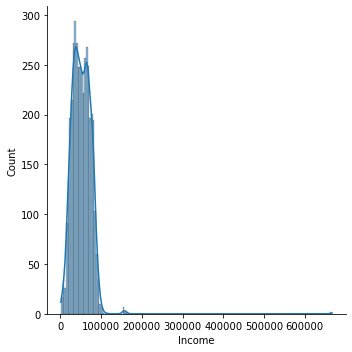

In [16]:
sns.displot(data=data, x='Income', kde=True)

> Видимо, не все клиенты готовы раскрывать свой доход. Заменим на медианное значение, т.к. есть выбросы.

> **Заполняем пропуски**

In [17]:
data['MntFruits_bool'] = np.where(data['MntFruits'].isnull(), 0, 1)
data['MntWines_bool'] = np.where(data['MntWines'].isnull(), 0, 1)

data['MntFruits'] = data['MntFruits'].fillna(0)
data['MntWines'] = data['MntWines'].fillna(0)

income_median = data['Income'].median()
data['Income'] = data['Income'].fillna(income_median)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 14238
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4157 non-null   int64  
 1   Year_Birth           4157 non-null   int64  
 2   Education            4157 non-null   object 
 3   Marital_Status       4157 non-null   object 
 4   Income               4157 non-null   float64
 5   Kidhome              4157 non-null   int64  
 6   Teenhome             4157 non-null   int64  
 7   Dt_Customer          4157 non-null   object 
 8   Recency              4157 non-null   int64  
 9   MntWines             4157 non-null   float64
 10  MntFruits            4157 non-null   float64
 11  MntMeatProducts      4157 non-null   int64  
 12  MntFishProducts      4157 non-null   int64  
 13  MntSweetProducts     4157 non-null   int64  
 14  MntGoldProds         4157 non-null   int64  
 15  NumDealsPurchases    4157 non-null   

In [19]:
data.isnull().mean().sum() # нет пропусков

0.0

##### Работа с типами
- Поля "MntWines" и "MntFruits" аналогично другим полям из блока "Products" переведу в int64 (из-за пропусков был тип float).
- Поле "Income" переведу в int64 (из-за пропусков был тип float).
- Поле "Dt_Customer" является датой, переведу в datetime.

In [20]:
num_cols = ['MntWines', 'MntFruits', 'Income']

for col in num_cols:
    data[col] = data[col].astype(int)
    
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

#### Рассмотрим данные поближе

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 14238
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   4157 non-null   int64         
 1   Year_Birth           4157 non-null   int64         
 2   Education            4157 non-null   object        
 3   Marital_Status       4157 non-null   object        
 4   Income               4157 non-null   int32         
 5   Kidhome              4157 non-null   int64         
 6   Teenhome             4157 non-null   int64         
 7   Dt_Customer          4157 non-null   datetime64[ns]
 8   Recency              4157 non-null   int64         
 9   MntWines             4157 non-null   int32         
 10  MntFruits            4157 non-null   int32         
 11  MntMeatProducts      4157 non-null   int64         
 12  MntFishProducts      4157 non-null   int64         
 13  MntSweetProducts     4157 non-nu

In [22]:
data[f_numeric].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1968.809478,52120.573731,0.445514,0.511908,48.958143,229.951167,19.760645,164.895838,36.889584,26.933847,43.637479,2.317056,4.077460,2.625932,5.770748,5.356026
std,11.999570,25091.717724,0.535305,0.545932,28.912061,319.947737,36.194729,222.448399,54.024436,41.272565,52.131646,1.901074,2.773493,2.875476,3.242691,2.433677
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35416.000000,0.000000,0.000000,24.000000,0.000000,0.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000
50%,1970.000000,51075.000000,0.000000,0.000000,49.000000,48.000000,3.000000,66.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,67716.000000,1.000000,1.000000,74.000000,380.000000,21.000000,228.000000,49.000000,32.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [23]:
data[f_binary].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,0.071686,0.076497,0.073611,0.063267,0.014193,0.010585,0.146259
std,0.257999,0.265824,0.261168,0.243471,0.118300,0.102348,0.353409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
for el in f_binary:    
    print(el)
    print(data[el].value_counts())
    print('---')

for el in f_nominal:    
    print(el)
    print(data[el].value_counts())
    print('---')

AcceptedCmp3
0    3859
1     298
Name: AcceptedCmp3, dtype: int64
---
AcceptedCmp4
0    3839
1     318
Name: AcceptedCmp4, dtype: int64
---
AcceptedCmp5
0    3851
1     306
Name: AcceptedCmp5, dtype: int64
---
AcceptedCmp1
0    3894
1     263
Name: AcceptedCmp1, dtype: int64
---
AcceptedCmp2
0    4098
1      59
Name: AcceptedCmp2, dtype: int64
---
Complain
0    4113
1      44
Name: Complain, dtype: int64
---
Response
0    3549
1     608
Name: Response, dtype: int64
---
Marital_Status
Married     1580
Together    1103
Single       906
Divorced     418
Widow        137
YOLO           6
Alone          5
Absurd         2
Name: Marital_Status, dtype: int64
---
Education
Graduation    2096
PhD            904
Master         678
2n Cycle       376
Basic          103
Name: Education, dtype: int64
---


#### LabelEncoder

In [25]:
le_marital = LabelEncoder()
Marital_Status_Label = le_marital.fit_transform(data['Marital_Status'])
le_edu = LabelEncoder()
Education_Label = le_edu.fit_transform(data['Education'])

In [26]:
data['Marital_Status_Label'] = Marital_Status_Label
data['Education_Label'] = Education_Label
data[['Marital_Status', 'Marital_Status_Label', 'Education', 'Education_Label']].head(10)

,Marital_Status,Marital_Status_Label,Education,Education_Label
0,Single,4,Graduation,2
1,Single,4,Graduation,2
2,Together,5,Graduation,2
3,Together,5,Graduation,2
4,Married,3,PhD,4
5,Together,5,Master,3
6,Divorced,2,Graduation,2
7,Married,3,PhD,4
8,Together,5,PhD,4
9,Together,5,PhD,4


#### OneHotEncoder

In [27]:
ohe_marital = OneHotEncoder()
marital_matrix = ohe_marital.fit_transform(data[['Marital_Status']])
marital_matrix = marital_matrix.toarray()
df_marital_matrix = pd.DataFrame(marital_matrix, columns=ohe_marital.categories_[0])
df_marital_matrix.index = data.index

df_marital_matrix.head(5)

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
ohe_edu = OneHotEncoder()
education_matrix = ohe_edu.fit_transform(data[['Education']])
education_matrix = education_matrix.toarray()
df_education_matrix = pd.DataFrame(education_matrix, columns=ohe_edu.categories_[0])
df_education_matrix.index = data.index

df_education_matrix.head(5)

,2n Cycle,Basic,Graduation,Master,PhD
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [29]:
data = data.join(df_marital_matrix)
data = data.join(df_education_matrix)

In [30]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'MntFruits_bool', 'MntWines_bool', 'Marital_Status_Label',
       'Education_Label', 'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'YOLO', '2n Cycle', 'Basic', 'Graduation',
       'Master', 'PhD'],
      dtype='object')

In [31]:
data[['ID', 'Education', 'Marital_Status', 'Marital_Status_Label',
       'Education_Label', 'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'YOLO', '2n Cycle', 'Basic', 'Graduation',
       'Master', 'PhD']].head(10)

,ID,Education,Marital_Status,Marital_Status_Label,Education_Label,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,2n Cycle,Basic,Graduation,Master,PhD
0,5524,Graduation,Single,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,Graduation,Single,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,Graduation,Together,5,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,Graduation,Together,5,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,PhD,Married,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,7446,Master,Together,5,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,965,Graduation,Divorced,2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,6177,PhD,Married,3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,4855,PhD,Together,5,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,5899,PhD,Together,5,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
